In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


In [3]:
osakamesh1 = gpd.read_file('osakadata/SDDSWS5135.zip')
osakamesh2 = gpd.read_file('osakadata/SDDSWS5235.zip')

In [4]:
osakamesh = gpd.pd.concat([osakamesh1,osakamesh2])

<Axes: >

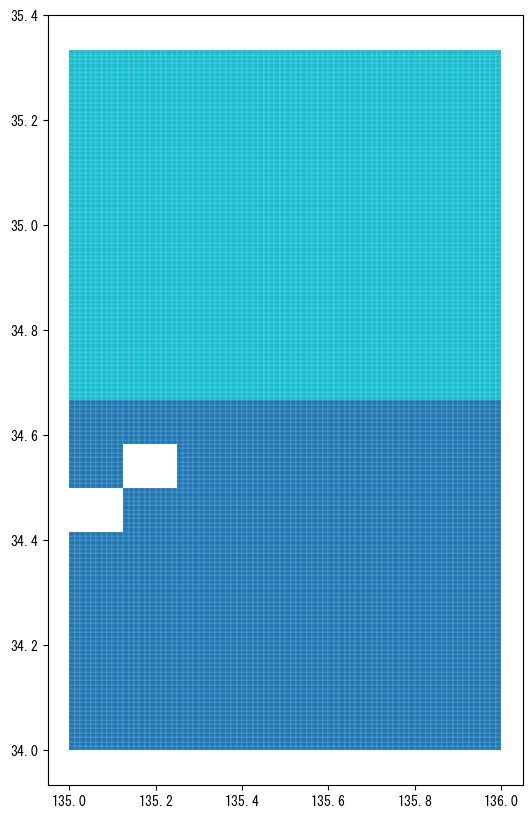

In [8]:
osakamesh.plot(figsize=(10,10),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [22]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
osakadata1 = pd.read_csv('osakadata/tblT001100S5135.zip', encoding='cp932')
osakadata2 = pd.read_csv('osakadata/tblT001100S5235.zip', encoding='cp932')
osakadata3 = pd.read_csv('osakadata/tblT000846S5135.zip', encoding='cp932')
osakadata4 = pd.read_csv('osakadata/tblT000846S5235.zip', encoding='cp932')

In [26]:
# 8つのテーブルから１行目を削除
osakadata1 = osakadata1[1:]
osakadata2 = osakadata2[1:]
osakadata3 = osakadata3[1:]
osakadata4 = osakadata4[1:]

In [27]:
# ４つのテーブルから「＊」を非数に置き換える
osakadata1 = osakadata1.replace('*',np.nan)
osakadata2 = osakadata2.replace('*',np.nan)
osakadata3 = osakadata3.replace('*',np.nan)
osakadata4 = osakadata4.replace('*',np.nan)

In [30]:
osakadata2020 = pd.concat([osakadata1,osakadata2])

In [31]:
osakadata2015 = pd.concat([osakadata3,osakadata4])

In [34]:
columns_to_drop = ['HTKSYORI','HTKSAKI','GASSAN']
osakadata2020 = osakadata2020.drop(columns=columns_to_drop)

In [36]:
columns_to_drop = ['HTKSYORI','HTKSAKI','GASSAN']
osakadata2015 = osakadata2015.drop(columns=columns_to_drop)

In [38]:
osakadata2020.columns[1:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [40]:
osakadata2015.columns[1:]

Index(['T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',
       'T000846016', 'T000846017', 'T000846018', 'T000846019', 'T000846020',
       'T000846021', 'T000846022', 'T000846023', 'T000846024', 'T000846025',
       'T000846026', 'T000846027', 'T000846028', 'T000846029', 'T000846030',
       'T000846031', 'T000846032', 'T000846033', 'T000846034', 'T000846035',
       'T000846036', 'T000846037', 'T000846038', 'T000846039', 'T000846040',
       'T000846041'],
      dtype='object')

In [41]:
# 元のデータを入れ替える
osakadata2020[osakadata2020.columns[1:]]=osakadata2020[osakadata2020.columns[1:]].astype(float)

In [42]:
# 元のデータを入れ替える
osakadata2015[osakadata2015.columns[1:]]=osakadata2015[osakadata2015.columns[1:]].astype(float)

In [44]:
# KEY_CODEをfloatに
osakadata2020['KEY_CODE']=osakadata2020['KEY_CODE'].astype(float)

In [45]:
# KEY_CODEをfloatに
osakadata2015['KEY_CODE']=osakadata2015['KEY_CODE'].astype(float)

In [46]:
# merge the data
osakadata2020 = osakadata2020.merge(osakadata2020, on='KEY_CODE')

In [47]:
# merge the data
osakadata2015 = osakadata2015.merge(osakadata2015, on='KEY_CODE')